In [18]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import os
from pandas.io.json import json_normalize
import json
import datetime as dt

In [19]:
df = pd.read_csv('raw_data.csv')

In [20]:
df

,timestamp,open (USD),high (USD),low (USD),close (USD),open (USD).1,high (USD).1,low (USD).1,close (USD).1,volume,market cap (USD)
0,2020-09-20,11080.64,11080.64,11046.54,11047.40,11080.64,11080.64,11046.54,11047.40,811.458671,811.458671
1,2020-09-19,10933.40,11179.79,10887.37,11080.65,10933.40,11179.79,10887.37,11080.65,38440.036858,38440.036858
2,2020-09-18,10940.00,11038.03,10812.84,10933.39,10940.00,11038.03,10812.84,10933.39,47266.728275,47266.728275
3,2020-09-17,10954.01,11045.46,10745.83,10939.99,10954.01,11045.46,10745.83,10939.99,55601.614529,55601.614529
4,2020-09-16,10785.23,11093.00,10661.22,10954.01,10785.23,11093.00,10661.22,10954.01,64991.512440,64991.512440
...,...,...,...,...,...,...,...,...,...,...,...
995,2017-12-30,14378.99,14398.85,11750.00,12440.01,14378.99,14398.85,11750.00,12440.01,19221.158039,19221.158039
996,2017-12-29,14199.14,14981.00,13850.00,14378.90,14199.14,14981.00,13850.00,14378.90,18072.008116,18072.008116
997,2017-12-28,15459.97,15539.99,13150.00,14182.11,15459.97,15539.99,13150.00,14182.11,21717.858014,21717.858014
998,2017-12-27,15709.98,16498.05,14200.15,15459.99,15709.98,16498.05,14200.15,15459.99,14959.864723,14959.864723


In [28]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
# df.groupby('close (USD)').resample('W-Mon', on='timestamp').sum().reset_index()
df['week_date'] = df.apply(lambda row: row['timestamp'] - dt.timedelta(days=row['timestamp'].weekday()), axis=1)

# perweek = df['week_date'].groupby(df['WeekDate']).count()
new_df = df.groupby(df['week_date'])['close (USD)'].mean().reset_index().sort_values('week_date')

In [29]:
import matplotlib.pyplot as plt


<Figure size 432x288 with 0 Axes>

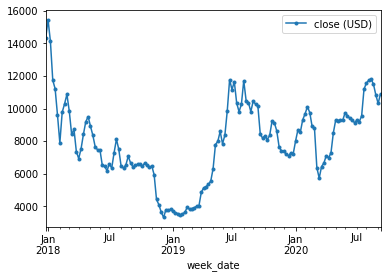

In [35]:
plt.figure();

fig = new_df.plot(x='week_date', y='close (USD)', marker='.', kind= 'line')
fig.get_figure().savefig('weekly_average.png')

In [ ]:
plt.savefig('task1.png')

In [37]:
new_df.columns[0]

'week_date'

In [55]:
df['7day'] = df[['timestamp', 'close (USD)']].rolling(window=7).mean()
day7_rolling_df = df[['timestamp','7day']].dropna()
day7_rolling_df.plot(x='timestamp', y='7day', marker='.', kind= 'line')
fig.get_figure().savefig('7day_rolling.png')

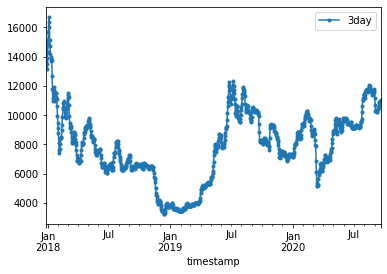

In [58]:
df['3day'] = df[['timestamp', 'close (USD)']].rolling(window=3).mean()
day3_rolling_df = df[['timestamp','3day']].dropna()
day3_rolling_df.plot(x='timestamp', y='3day', marker='.', kind= 'line')
fig.get_figure().savefig('3day_rolling.png')